# 1. Python Fundamentals

Merge “articleInfo.csv” and “authorInfo.csv” into one data frame based on “Article
No.”, fill all empty cells with the value of 0, and answer the following questions.

In [1]:
import pandas as pd
import numpy as np

In [47]:
# load and merge the datasets. this will give us repeat rows of articles for multiple authors
df = pd.merge(pd.read_csv('data/articleInfo.csv'), pd.read_csv('data/authorInfo.csv'), on='Article No.')
df.fillna(0, inplace=True) # fill empty/NaN cells with 0
print(df.info()) # print column name, count, datatpe
print(df.head()) # print first few entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Article No.         388 non-null    int64  
 1   Title               388 non-null    object 
 2   Year                388 non-null    int64  
 3   Author Number       388 non-null    float64
 4   Key Words           388 non-null    object 
 5   Citation            388 non-null    float64
 6   Source              388 non-null    object 
 7   Abstract            388 non-null    object 
 8   Type                388 non-null    object 
 9   Author Name         388 non-null    object 
 10  Author Affiliation  388 non-null    object 
 11  Country             388 non-null    object 
 12  h-index             388 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 42.4+ KB
None
   Article No.                                              Title  Year  \
0            1  S

1. Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is
the number of articles published during that year.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print(mpl.__name__, '--', mpl.__version__)

matplotlib -- 3.5.0


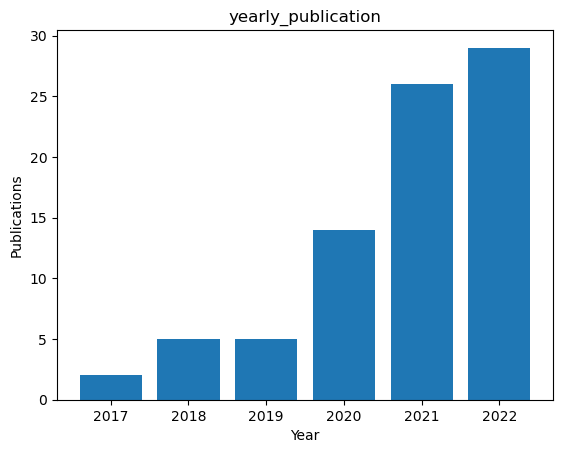

In [4]:
# drop duplicate articles so that number of publications is consistent with articles and not authors
# also, get the count over each year
data = df.drop_duplicates(subset=['Article No.']).Year.value_counts()

plt.bar(data.index.values, data.values)
# year as independent variable, article count as dependent
plt.title('yearly_publication')
plt.xlabel('Year')
plt.ylabel('Publications')
plt.show()

2. Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the
total number of citations during that year.

Year
2017    672.0
2018    568.0
2019    386.0
2020    349.0
2021    321.0
2022     63.0
Name: Citation, dtype: float64


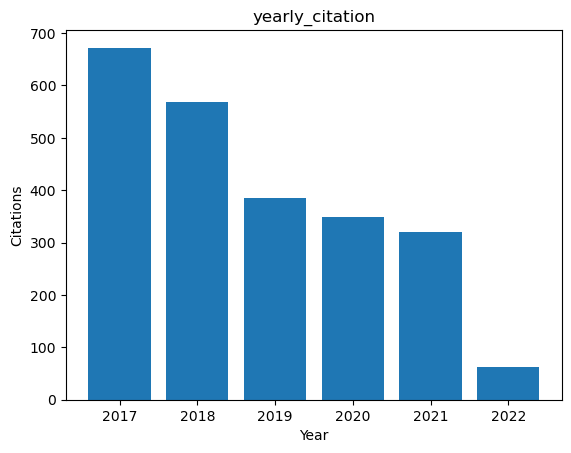

In [5]:
# again, dropping the duplicates so that citations are by article and not by author. I'm not sure if this is what is
# expected since we were asked to allow duplicated in the geographic location map, but this makes intuitive sense to me
data = df.drop_duplicates(subset=['Article No.']).groupby('Year')['Citation'].sum()

plt.bar(data.index.values, data.values)
# plot year as independent variable and number of citations from that article as dependent var
plt.title('yearly_citation')
plt.xlabel('Year')
plt.ylabel('Citations')
plt.show()

3. Plot the figure of the number of publications across countries. You may use
any available python libraries, such as pygal_maps_world, geopandas, or
others.

In [6]:
import geopandas as gpd

print(gpd.__name__, '--', gpd.__version__)

geopandas -- 0.12.2


In [51]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world = df_world.loc[df_world['continent'] != 'Antarctica']
print(df_world)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

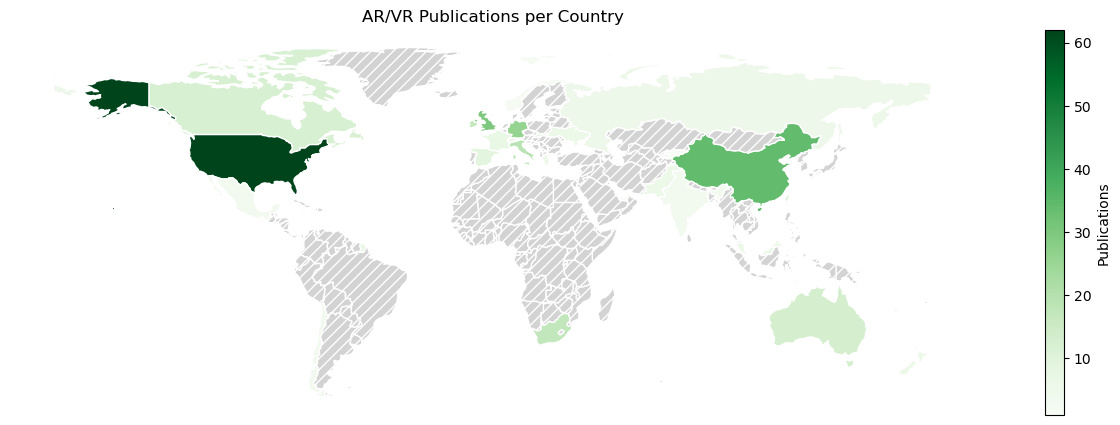

In [53]:
# load the geopandas earth file (contains shape and names for countries/continents)
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# remove antarctica because it is not necessary
df_world = df_world.loc[df_world['continent'] != 'Antarctica']

# get the number of articles (including duplicates) by Country
data = df.groupby('Country')['Country'].count()

# remove data points where country = 0, there are two of these
data = data[data.index != 0]
df_publications = pd.DataFrame({'name': data.index, 'count': data.values})

# match df_publication to country name in df_world, for USA is 'United States of America', not 'USA'
df_publications.loc[df_publications.name == 'USA', 'name'] = 'United States of America'

# merge on country name
df_world_publications = df_world.merge(df_publications, on='name', how='left')

df_world_publications.plot(
    column='count',
    legend=True,
    figsize=(18,5),
    edgecolor='white',
    legend_kwds={'label': 'Publications'},
    cmap='Greens',
     # add background for countries with no articles
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "///"}
)
plt.axis('off')
plt.title('AR/VR Publications per Country');

4. What are the top 5 institutions that have the most published articles in this
area?

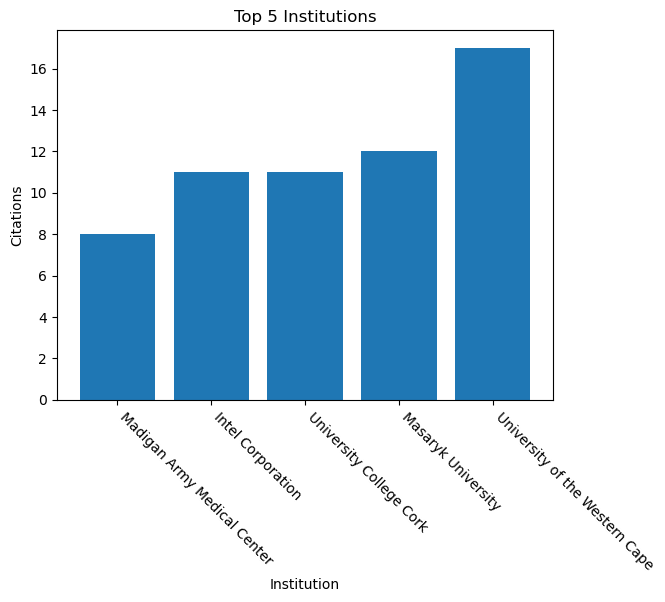

In [8]:
# groupby author affiliation (institution) and then select the 5 greatest counts
# return them sorted so that graph is cleaner
data = df.groupby('Author Affiliation')['Author Affiliation'].count().nlargest(5).sort_values()
plt.bar(data.index.values, data.values)
plt.title('Top 5 Institutions')
plt.xlabel('Institution')
plt.ylabel('Citations')
plt.xticks(rotation=-45, ha='left')
plt.show()

5. Who are the top 5 researchers that have the most h-index in this area?

[('Nicolas Molinari', 102), ('Ulrich Trautwein', 117), ('George S. Athwal', 130), ('Maria Luisa Lorusso', 140), ('Vicente A. González', 147)]


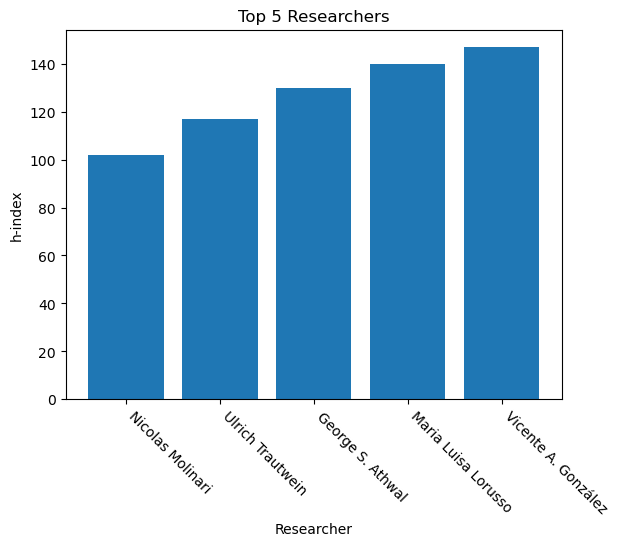

In [9]:
# find 5 largest h-index values and then store the author's name
data = df.nlargest(5, 'h-index')['Author Name'].sort_index()
print(list(zip(data, data.index)))
plt.bar(data.values, data.index.values)
plt.title('Top 5 Researchers')
plt.xlabel('Researcher')
plt.ylabel('h-index')
plt.xticks(rotation=-45, ha='left')
plt.show()

# 2. Regression

1. Show the statistical results of your trained regression model.

In [10]:
import sklearn
import seaborn as sns

print(sklearn.__name__, '--', sklearn.__version__)
print(sns.__name__, '--', sns.__version__)

sklearn -- 1.0.2
seaborn -- 0.11.2


In [11]:
df = pd.read_csv('data/data.csv')
df.drop('Unnamed: 6', axis=1, inplace=True) # remove empty column
df.insert(0, 'SUS', df.pop('SUS')) # make SUS column first column in dataframe
print(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SUS           100 non-null    int64
 1   Purchase      100 non-null    int64
 2   Duration      100 non-null    int64
 3   Gender        100 non-null    int64
 4   ASR_Error     100 non-null    int64
 5   Intent_Error  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB
None    SUS  Purchase  Duration  Gender  ASR_Error  Intent_Error
0   84         1       254       0          3             2
1   58         0       247       0          6             9
2   56         0       125       1          6             8
3   55         0        22       0         11             7
4   95         1       262       0          2             3


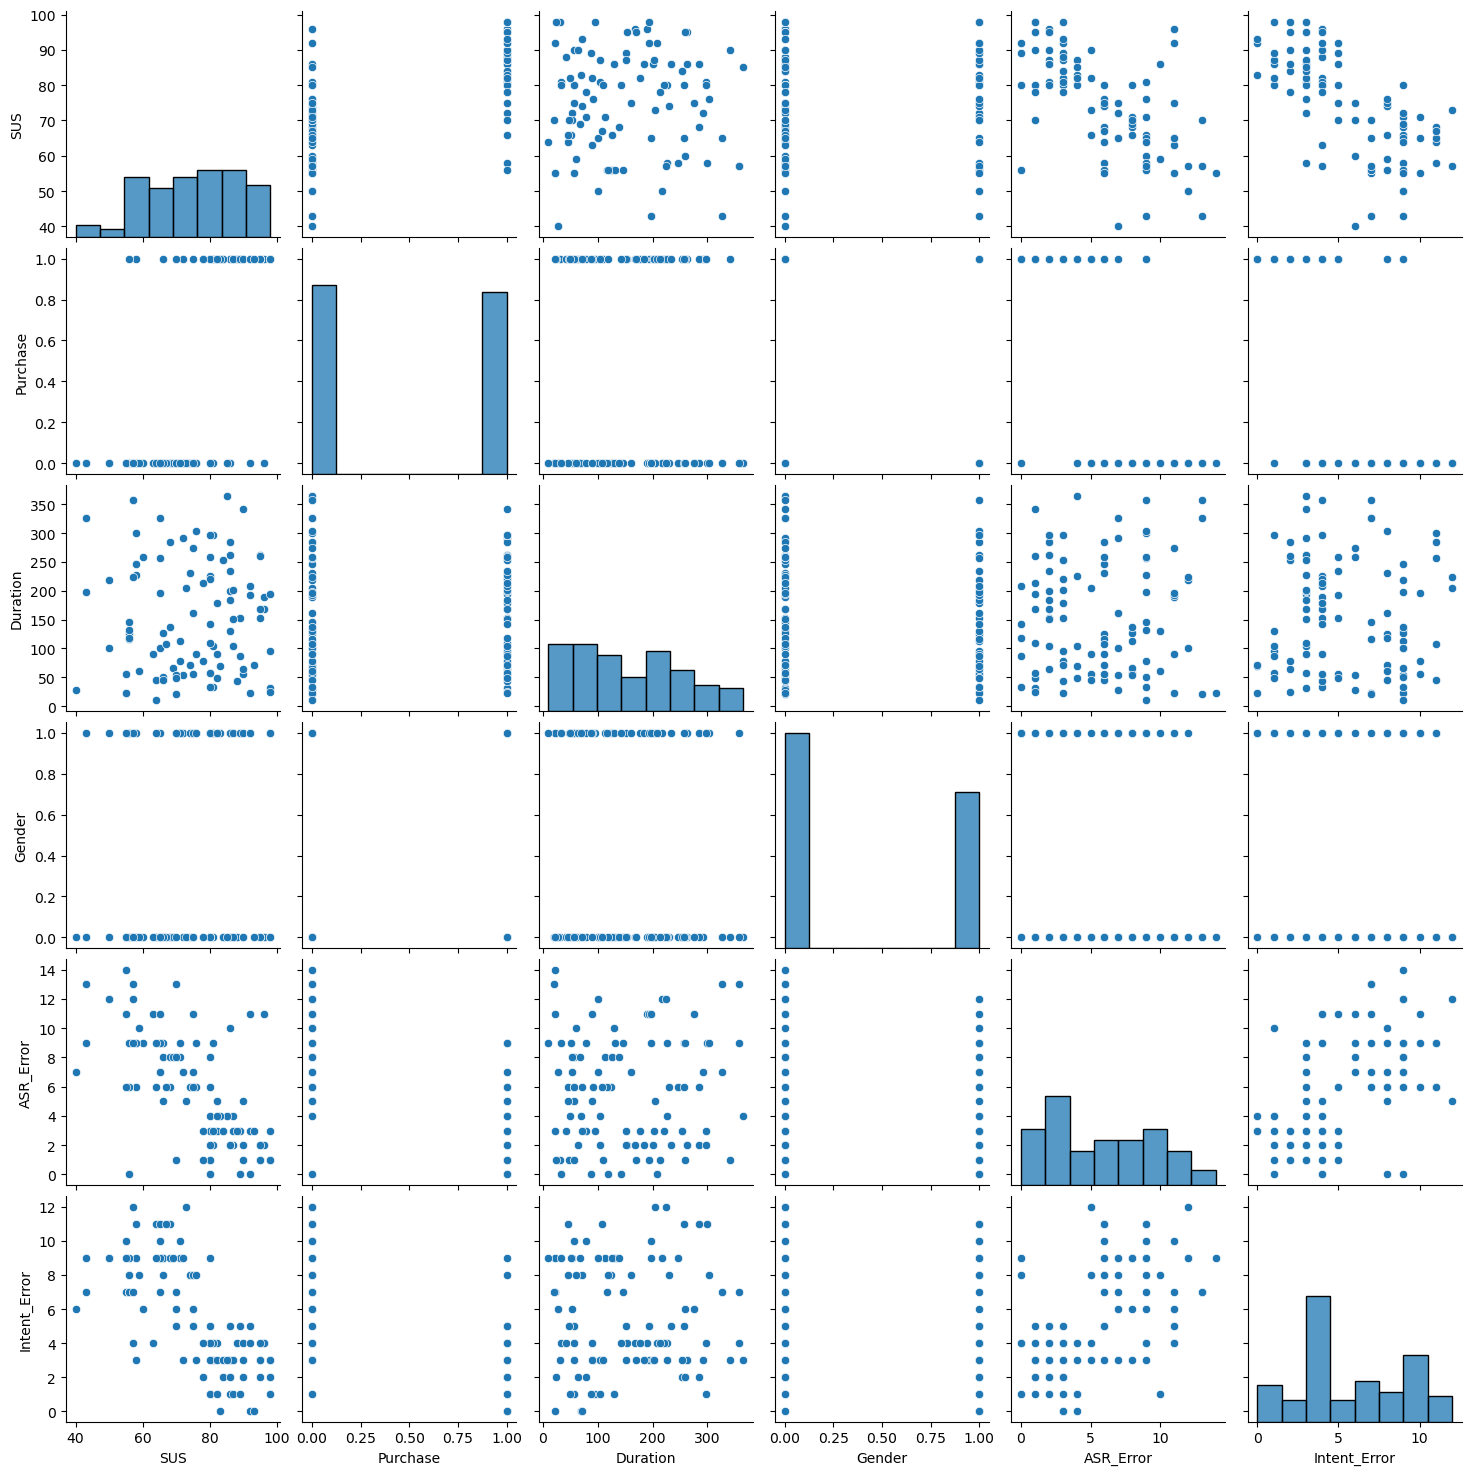

In [12]:
# scatter plot of all features against one another

sns.pairplot(df)
plt.show()

# we can see a strong linear relationship between SuUS and Intent_Error, SUS and ASR_Error, and between Intent_Error and ASR_error
# this suggests that ASR_Error and Intent_Error are collinear, it may be benneficial to remove one of them

<AxesSubplot:>

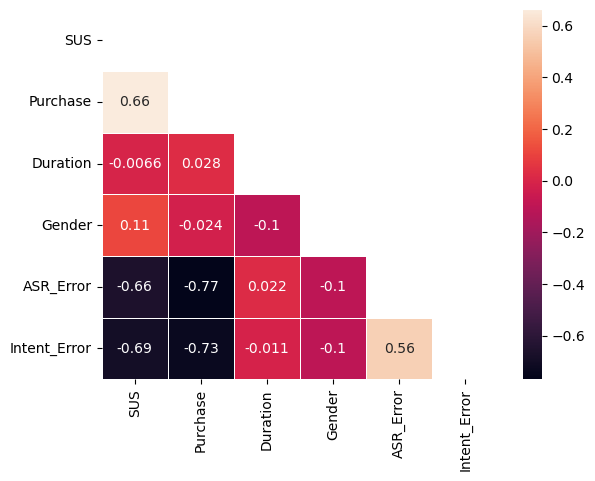

In [13]:
# plot heatmap of the features

corr_matrix = df.corr()

# mask to remove upper triangle from heatmap (these are repeats, we don't need them)
# we also remove the diagonal because these are the coefficients between the same features (will always equal 1)
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5)

# we again, see strong correlation for SUS with ASR_Error and Intent_Error, but also with Purchase
# Becasue ASR_error and Intent_Error have a strong correlation with one another, we should remove one
# Intent_error has a stronger correlation with SUS, so it could be a good choice to remove ASR_Error

In [14]:
df.corr(method='pearson')['SUS'].sort_values()

# we once again see that ASR_error, Intenr_error, and purchase have the strongest correlation with SUS

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

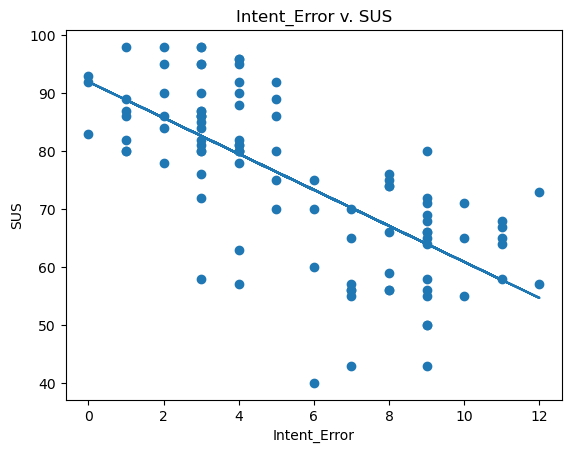

In [15]:
plt.scatter(df['Intent_Error'], df['SUS'])
plt.title('Intent_Error v. SUS')
plt.xlabel('Intent_Error')
plt.ylabel('SUS')

z = np.polyfit(df['Intent_Error'], df['SUS'], 1)
p = np.poly1d(z)

plt.plot(df['Intent_Error'], p(df['Intent_Error']))

plt.show()

# here we show the linear trendline between intent_erro and SUS

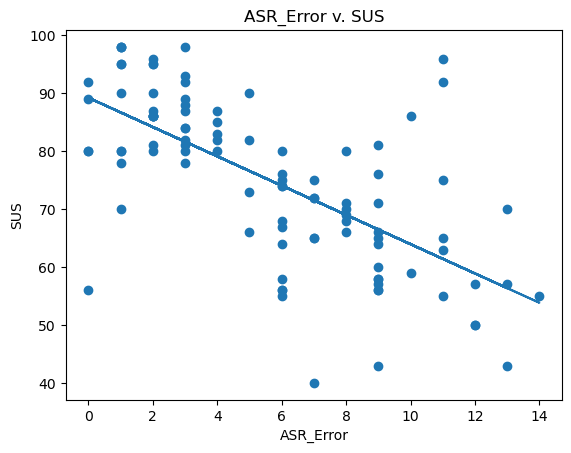

In [16]:
plt.scatter(df['ASR_Error'], df['SUS'])
plt.title('ASR_Error v. SUS')
plt.xlabel('ASR_Error')
plt.ylabel('SUS')

z = np.polyfit(df['ASR_Error'], df['SUS'], 1)
p = np.poly1d(z)

plt.plot(df['ASR_Error'], p(df['ASR_Error']))

plt.show()

# here we show the linear trendline between asr_error and SUS
# we can see that it is very similar to that of intent_error

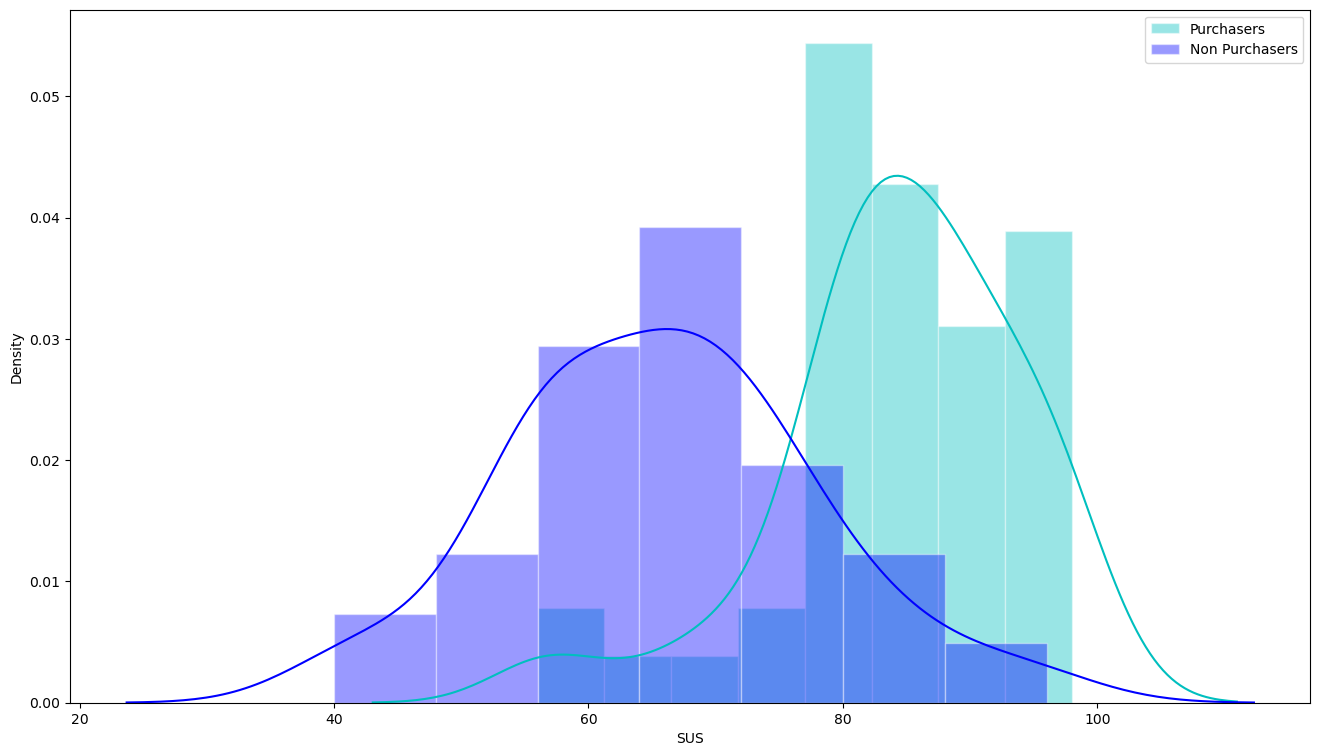

In [17]:
fig, ax = plt.subplots(figsize=(16,9))

# parameters to use histplot like future depricated function distplot
histplot_like_distplot = {
    'kde': True,
    'stat': 'density',
    'kde_kws': dict(cut=3),
    'alpha': .4,
    'edgecolor': (1,1,1,.4)
}

sns.histplot(df.loc[df['Purchase'] == 1]['SUS'], **histplot_like_distplot, color='c', label='Purchasers')
sns.histplot(df.loc[df['Purchase'] == 0]['SUS'], **histplot_like_distplot, color='b', label = 'Non Purchasers')

ax.legend(loc='upper right')

plt.show()

# here we plot the distribution density of purchase with SUS
# we can see that the distributions between those who purchased tickets with siri and those that did not are distinct

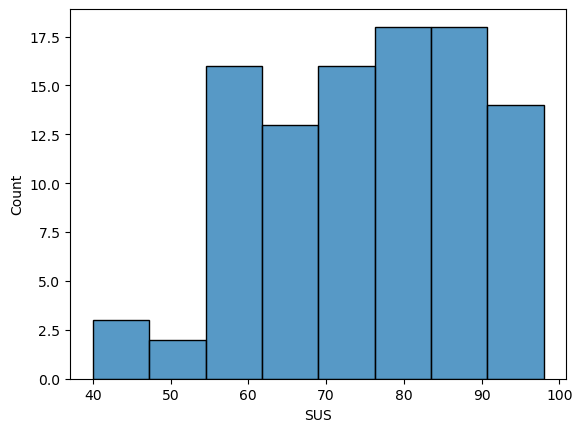

In [18]:
sns.histplot(data=df['SUS'])
plt.show()

In [19]:
import statsmodels.api as sm

y = df['SUS']
x = df.drop(columns='SUS')

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        17:48:29   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
df = pd.read_csv('data/data.csv')
df.drop('Unnamed: 6', axis=1, inplace=True)

# df.drop(['Gender', 'Duration', 'ASR_Error'], axis=1, inplace=True) # drop the features that are either unimportant or have strong collinearity

x = df.drop(columns=['SUS'])
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [22]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.42406255795305225


In [23]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503424783


2. What features are significant? What features are insignificant?

In [24]:
df_ceof1 = pd.DataFrame(list(x.columns)).copy()
df_ceof1.insert(len(df_ceof1.columns), 'Coefs', lr.coef_.transpose())

# sort coefficients showing greatest absolute value first
df_ceof1 = df_ceof1.reindex(df_ceof1['Coefs'].abs().sort_values(ascending=False).index)
print(df_ceof1)

# we can see that features: gener, intenr_error, asr_error, and purchase were signficatn becasue the coefficients used in
# the trained linear regression model were not close to zero. additionally, we see that duration was insignificant because
# the coefficients is close to 0

              0     Coefs
0      Purchase  2.954109
4  Intent_Error -1.928484
3     ASR_Error -1.421428
2        Gender  1.420031
1      Duration -0.002495


In [25]:
df_coef2 = pd.DataFrame(list(quad.get_feature_names_out())).copy()
df_coef2.insert(len(df_coef2.columns), 'Coefs', plr.coef_.transpose())

# sort coefficients showing greatest absolute value first
df_coef2 = df_coef2.reindex(df_coef2['Coefs'].abs().sort_values(ascending=False).index)

print(df_coef2)

# we see that in the quadratic regression, purchase, gender, pruchase ^ 2, purchase * gender, and gender ^ 2 were the most
#significant as they have the largest coefficients

                         0      Coefs
8          Purchase Gender -15.047937
1                 Purchase  12.452042
6               Purchase^2  12.452042
3                   Gender   8.838507
15                Gender^2   8.838507
10   Purchase Intent_Error  -1.966433
17     Gender Intent_Error  -1.080545
4                ASR_Error  -1.075984
5             Intent_Error  -0.450433
2                 Duration   0.187104
18             ASR_Error^2   0.104962
7        Purchase Duration  -0.086226
16        Gender ASR_Error   0.052041
19  ASR_Error Intent_Error  -0.049358
9       Purchase ASR_Error   0.043392
12         Duration Gender  -0.011646
13      Duration ASR_Error  -0.009627
20          Intent_Error^2  -0.007851
14   Duration Intent_Error  -0.002611
11              Duration^2  -0.000197
0                        1   0.000000


In [26]:
# additionly, when viewing the output of the least squares regressor, we see that purchase, asr_error, and intent_error
# have the largest coefficients, and also that asr_error and intent_error have the lowest p scores, confirming that these
# features are significant

3. Were the results what you expected? Explain why or why not, for each
feature.

In [ ]:
# both errors having a large impact on SUS scores was expected because it is intutive that the more errors a user has when
# using Siri, the less useable they will percieve Siri to be. I didn't expect purchase to have such a high correlation with
# SUS score. I did assume it would be correlated, but not mroe so than both types of errors. Also, I did not expect gender
# to have a high correlation with SUS score because I assumed that the SUS scores would be pretty evenly distributed for
# both genders. Although these correlations appear in the linear regression model, it is likely that this data does not
# depict the full picture since we only have access to 100 tuples. I also did not expect the polynomial regression to place
# far more emphasis on gender and purchase than asr_error and intent_error. I did, however, expect asr_error and
# intent_error to be collinear.

4. What does the model suggest is the most influential factor on SUS? Explain
what tells you this is the most influential factor statistically.

In [27]:
# the model suggests that purchase is the most influential factor on SUS. This is because in both the linear regression
# and the polynomial regression model, the coefficient for purchase has the greatest absolute value

5. What are the potential reasons for these factor(s) being significant predictors
of SUS?

In [28]:
# purchase being a significant predictor of SUS could be that those who were able to purchase plane tickets through SIRI
# found the siri interface to be very useable. ASR_error and Intent_error both ahving negative relationships with SUS makes
# sense because if a user has more errors with siri, they will likely find siri to be less useable. Gender may have a role
# because different genders may ask the same questions in different ways.

# 3. Classification

(40 points). For this question, use the same dataset in the above
question. Train a Classification model in which: the independent variables
(inputs) are “ASR_Error,” “IntentError,” “Duration,” and “Gender,”; the dependent
variable (output) is “Purchase.” Use the evaluation metrics we introduced in class to
compare the performance of the following four machine learning classification
algorithms: (1) Logistic Regression, (2) SVM, (3) Naive Bayes, and (4) Random
Forest.

In [29]:
df = pd.read_csv('data/data.csv')
df.drop(['Unnamed: 6', 'SUS'], axis=1, inplace=True) # remove empty column

print(df.head())

   Purchase  Duration  Gender  ASR_Error  Intent_Error
0         1       254       0          3             2
1         0       247       0          6             9
2         0       125       1          6             8
3         0        22       0         11             7
4         1       262       0          2             3


In [30]:
print(df.isna().sum())
# check for missing values
# there are no missing values, so we can continue

Purchase        0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64


In [31]:
X, y = df.drop('Purchase', axis=1).to_numpy(), df['Purchase'].to_numpy()
# X: everything but Purchase column
# y: purchase column

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
s = StandardScaler()
scaled_X = s.fit_transform(X)
# scale X using a standard scalar

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)
# split x and y into training and testing sets

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [35]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# create all 4 models

In [36]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train);

# train all 4 models

In [37]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

# predict the class and the class probabilities for the testing data
# this information will be used to analyze the performance of the models

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [39]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

# use classification_report to print the precision, recall, and f1-score for all 4 models

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              preci

In [40]:
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

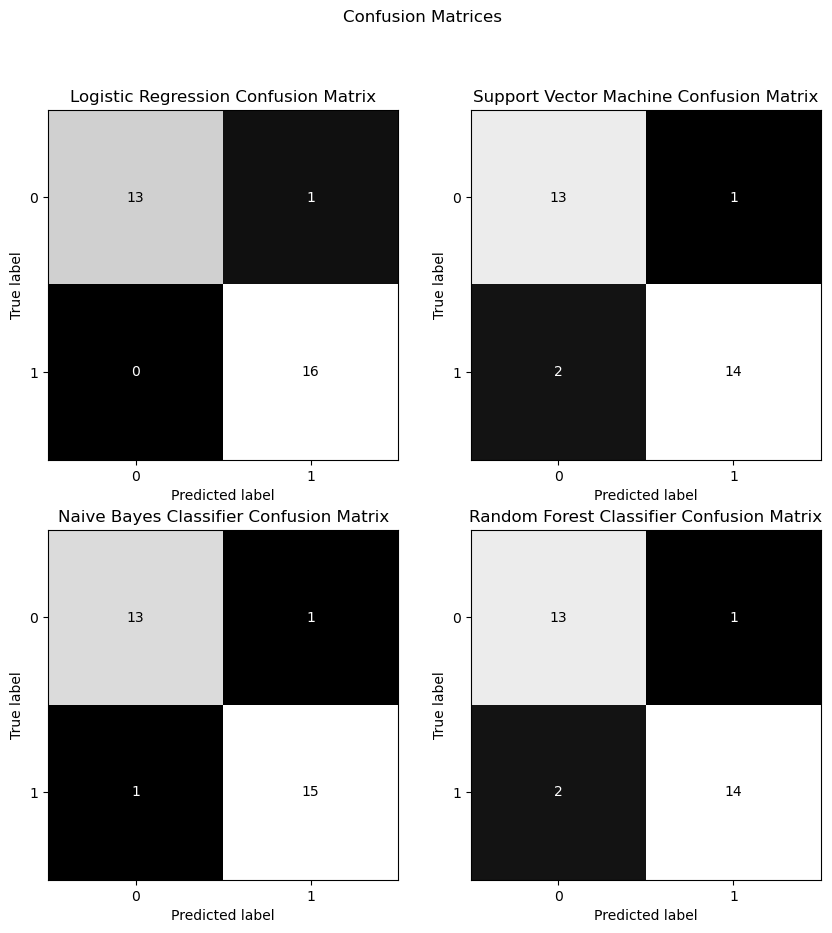

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

for model, prediction, pred_proba, ax in zip(models, predictions, pred_probabilities, [ax1, ax2, ax3, ax4]):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(include_values=True, cmap='gray', ax=ax, colorbar=False)
    disp.ax_.set_title(f'{model} Confusion Matrix')

plt.suptitle('Confusion Matrices')
plt.show()

# display the confusion matrix for each model

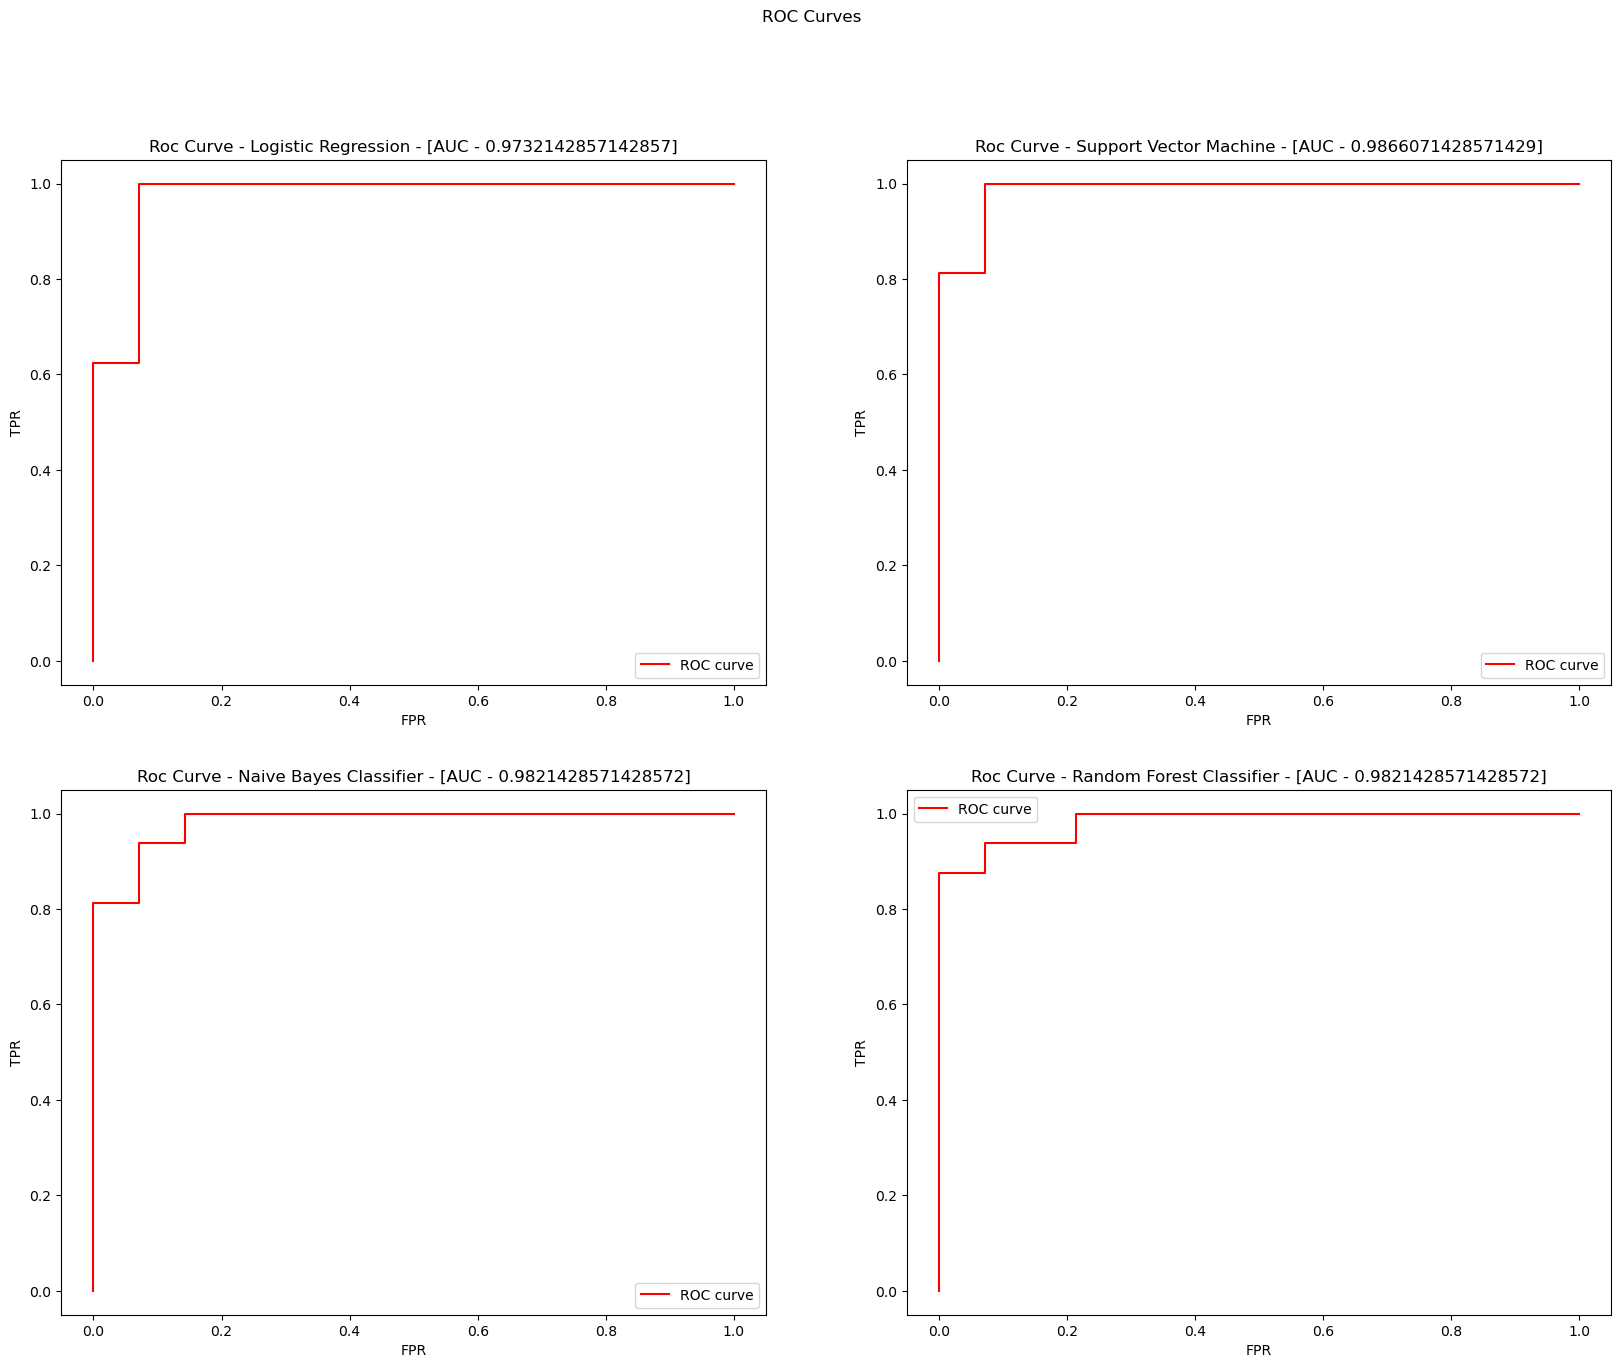

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

for model, prediction, pred_proba, ax in zip(models, predictions, pred_probabilities, [ax1, ax2, ax3, ax4]):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    ax.plot(fpr, tpr, 'r', label='ROC curve')
    auc_score = auc(fpr, tpr)
    ax.set_title(f'Roc Curve - {model} - [AUC - {auc_score}]')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend()
    
plt.suptitle('ROC Curves')
plt.show()

# plot the receiver operating characterisitc curve and display the area under the curve
# this data will be used to compare the models, we want an auc close to one

In [43]:
print(f"Purchase false rows: {df[df['Purchase'] == 0].shape[0]}")
print(f"Purchase true rows: {df[df['Purchase'] == 1].shape[0]}")

# our dataset is not imbalanced, so we do not need to use SMOTE

Purchase false rows: 51
Purchase true rows: 49


In [44]:
# no hyperparameter tuning was done, we are just showing four classifiers (Logistic Regression, SVM, Naive Bayes, Random
# Forest) with their default hyperparameters.

In [45]:
# because we have such few data points, it is difficult to definitevely say which model is better suited for classification
# because model performance depends so greatly on how the data was split in training and testing. When the training is rerun
# sometimes drastically different results are found. But with the output that we currently have, the Logistic Regression
# model is best because its accuracy is 0.97, while the other models have 0.90, 0.93, and 0.90, respctively. Looking at
# other performance indicators, we see that this model also has the highest f1-score as well as the greatest weighted avg
# precision of 0.97; the other models have a precision of 0.90, 0.93, and 0.90 as well. Although the logistic regression
# model is superiro for these performance indicators, all three other models do have a slightly larger AUC, but this is an
# unsubstantial difference (0.973 vs 0.98...). ALl four models have an AUC very close to one indicating that they are all
# extremely well suited for this problem. Through hyperparameter tuning and finding averages across many epochs, we will
# likely be able to have a more definitive answer on which model is best.